In [286]:
from matplotlib import pyplot as plt
import numpy as np
from random import choice
import time
from IPython.display import clear_output
from time import sleep 

In [ ]:

clear_output(True)
#plt.clf()
#plt.setp(plt.gca(), autoscale_on=False)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.gca().set_aspect("equal")
plt.grid()
plt.show()


In [ ]:
nrows, ncols = 4,4
image = np.zeros(nrows*ncols)
image[::2] = (nrows)
image = image.reshape((nrows,ncols))
row_labels = range(nrows)
col_labels = ["A", "B", "C", "D"]
print(image)
plt.matshow(image)
plt.yticks(range(nrows),row_labels)
plt.xticks(range(ncols),col_labels)
plt.show()

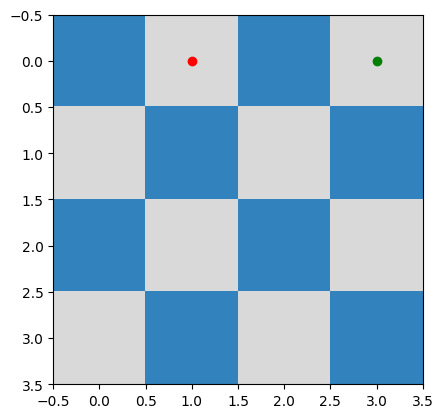

In [275]:
x = range(4)
y = range(4)
h,v = np.meshgrid(x,y)  #rect grid with vector coordinates (X,Y)
#min_max = np.min(x), np.max(x), np.min(y), np.max(y) 
res = np.add.outer(range(4), range(4))%2  # returns product of two vectors
positions=np.vstack([h.ravel(), v.ravel()]).T
start_position = choice(positions)
target_position = choice(positions)
possible_moves = [-1, 0, 1]

def draw_board():

    plt.xticks(minor=False)
    plt.yticks(minor=False)
    start_dot = plt.scatter(start_position[0],start_position[1],color="r")
    target_dot = plt.scatter(target_position[0],target_position[1],color="g")
    plt.imshow(res, cmap="tab20c")

if not np.array_equal(start_position,target_position):
    draw_board()


Target reached!
Route: [[1, 0], [0, 1], [0, 2], [0, 1], [0, 0], [1, 0], [0, 0], [0, 1], [1, 1], [0, 1], [1, 1], [1, 2], [0, 2], [0, 3], [0, 2], [1, 1], [0, 2], [0, 3], [1, 2], [2, 2], [2, 1], [3, 0]]


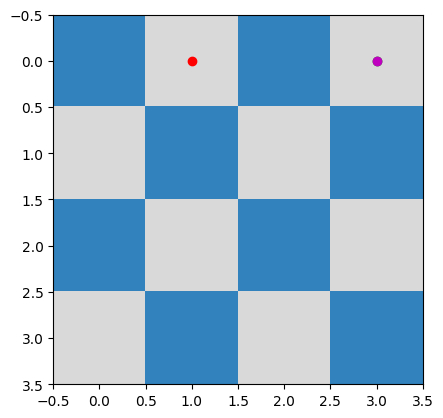

In [300]:
route = []
stepcounter = 0
route.append([start_position[0], start_position[1]])
newposx, newposy = 0, 0
while True:
    clear_output(True)
    draw_board()
    movex = choice(possible_moves)
    movey = choice(possible_moves)
    last_pos = route[-1]
    if movex == movey:
        continue
    if movex != 0 or movey != 0:
        newposx = last_pos[0] + movex
        newposy = last_pos[1] + movey
        if newposx >= 0 and newposx <= 3 and newposy >= 0 and newposy <= 3:
            #print(f"New pos: {newposx, newposy}")
            route.append([newposx, newposy])
            plt.scatter(newposx, newposy, color="m")
        if newposx == target_position[0] and newposy == target_position[1]:
            print("Target reached!")
            break
    plt.show()
    # inp = input("Explore")
    # if inp == "c":
    #     break
print(f"Route: {route}")